In [ ]:
#Importing required libraries for EDA

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff


In [ ]:
#Mounting Google Drive Cloud and importing dataset

from google.colab import drive
drive.mount('/content/gdrive')

import os 
os.chdir('/content/gdrive/MyDrive')
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Observing first few rows of dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Dropping the unnecessary column id from dataframe before exploratory analysis

df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Displaying basic info about dataset

df.info()
df.age.astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

In [ ]:
#Sum of the values in the dataset which are null

df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We can see that 201 values are Null (Missing)

In [ ]:
df.describe()
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

The values for average glucose level are quite in practical range but the BMI values seem to be a little off with 97.6 being the maximum.

In [ ]:
#Converting string values to boolean(categorical variables)

df.age = df.age.astype(int)
df[['hypertension','heart_disease', 'stroke']] = df[['hypertension','heart_disease', 'stroke']].astype(bool)
df.smoking_status=np.where(df['smoking_status']!='never smoked',True,False)
df.ever_married =np.where(df['ever_married']=='Yes',True,False)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,False,True,True,Private,Urban,228.69,36.6,True,True
1,Female,61,False,False,True,Self-employed,Rural,202.21,NaN,False,True
2,Male,80,False,True,True,Private,Rural,105.92,32.5,False,True
3,Female,49,False,False,True,Private,Urban,171.23,34.4,True,True
4,Female,79,True,False,True,Self-employed,Rural,174.12,24.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,True,False,True,Private,Urban,83.75,NaN,False,False
5106,Female,81,False,False,True,Self-employed,Urban,125.20,40.0,False,False
5107,Female,35,False,False,True,Self-employed,Rural,82.99,30.6,False,False
5108,Male,51,False,False,True,Private,Rural,166.29,25.6,True,False


In [ ]:
#Number of patients in this analysis
df.gender.value_counts()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
#Statistics of patients with hypertension
df.groupby(['hypertension', 'gender']).size().reset_index().pivot(columns= 'hypertension',index = 'gender', values=0) 

hypertension,False,True
gender,,
Female,2718.0,276.0
Male,1893.0,222.0
Other,1.0,NaN


In [ ]:
#Statistics of married patients
df.groupby(['ever_married', 'gender']).size().reset_index().pivot(columns= 'ever_married',index = 'gender', values=0) 

ever_married,False,True
gender,,
Female,993.0,2001.0
Male,763.0,1352.0
Other,1.0,NaN


In [ ]:
##Statistics of patients with high blood pressure
df.groupby(['heart_disease', 'gender']).size().reset_index().pivot(columns= 'heart_disease',index = 'gender', values=0) 

heart_disease,False,True
gender,,
Female,2881.0,113.0
Male,1952.0,163.0
Other,1.0,NaN


In [ ]:
#Statistics of patients with smoking habit
df.groupby(['smoking_status', 'gender']).size().reset_index().pivot(columns= 'smoking_status',index = 'gender', values=0) 

smoking_status,False,True
gender,,
Female,1229.0,1765.0
Male,663.0,1452.0
Other,NaN,1.0


In [ ]:
#Statistics of male and female patients who died during follow up period 
df.groupby(['stroke', 'gender']).size().reset_index().pivot(columns= 'stroke',index = 'gender', values=0) 


stroke,False,True
gender,,
Female,2853.0,141.0
Male,2007.0,108.0
Other,1.0,NaN


In [ ]:
#Number of  patients with abnormal glucose
abnormal_glucose = df[(df.avg_glucose_level < 80) | (df.avg_glucose_level>130)]
print("Total number of patients with abnormal glucose level : {}.".format(len(abnormal_glucose)))

Total number of patients with abnormal glucose level : 2450.


In [ ]:
#Number of  patients with abnormal bmi
abnormal_bmi = df[(df.bmi < 18.5) | (df.bmi >25)]
print("Total number of patients with abnormal bmi : {}.".format(len(abnormal_bmi)))

Total number of patients with abnormal bmi : 3639.


Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
#set some default style for our graphs
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'white'

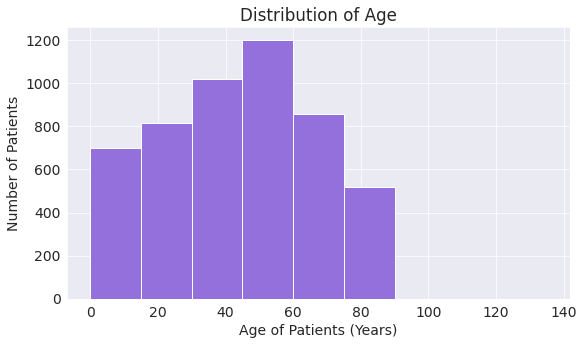

In [ ]:
#Distribution of age of the stroke patients
plt.hist(df.age, bins=np.arange(0,150, 15), color ='mediumpurple')
plt.xlabel("Age of Patients (Years)")
plt.ylabel("Number of Patients")
plt.title("Distribution of Age");

We can see that people in the ages of 40-60 years are the ones with maximum number in this dataset

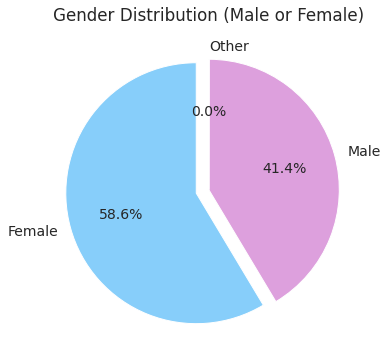

In [ ]:
#Distribution of gender of the stroke patients
gender_counts = df.gender.value_counts()
plt.figure(figsize=(12, 6))
plt.pie(gender_counts, labels = gender_counts.index, autopct ='%.1f%%', startangle = 90, explode = [0.1, 0,0], colors = ['lightskyblue', 'plum'])
plt.title("Gender Distribution (Male or Female)");

More women have been surveyed in this dataset than men hance its slightly imbalanced.

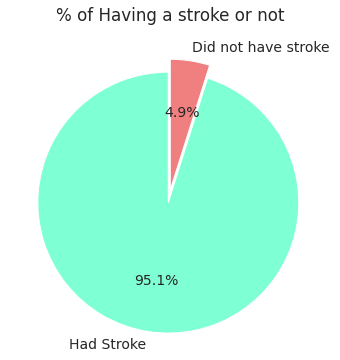

In [ ]:
#Stroke rate among patients
stroke_counts = df.stroke.value_counts()
plt.figure(figsize=(12, 6))
plt.pie(stroke_counts, labels = ['Had Stroke', 'Did not have stroke'] , autopct ='%.1f%%', startangle = 90, explode=[0.1, 0], colors =['aquamarine', 'lightcoral'])
plt.title("% of Having a stroke or not");

In [ ]:
#Creating a range of ages series
def create_range_series(number_series):
    
    condition = [
    (number_series >= 0) & (number_series < 5), 
    (number_series >= 5) & (number_series < 10), 
    (number_series >= 10) & (number_series < 15), 
    (number_series >= 15) & (number_series < 20), 
    (number_series >= 20) & (number_series < 25), 
    (number_series >= 25) & (number_series < 30), 
    (number_series >= 30) & (number_series < 35), 
    (number_series >= 35) & (number_series < 40), 
    (number_series >= 40) & (number_series < 45), 
    (number_series >= 45) & (number_series < 50), 
    (number_series >= 50) & (number_series < 55), 
    (number_series >= 55) & (number_series < 60), 
    (number_series >= 60) & (number_series < 65), 
    (number_series >= 65) & (number_series < 70), 
    (number_series >= 70) & (number_series < 75), 
    (number_series >= 75) & (number_series < 80), 
    (number_series >= 80) & (number_series < 85), 
    (number_series >= 85) & (number_series < 90), 
    (number_series >= 90) & (number_series < 95), 
    (number_series >= 95) & (number_series < 100)
    ]
    
    output = ['0-5', 
              '5-10', 
              '10-15', 
              '15-20', 
              '20-25', 
              '25-30', 
              '30-35', 
              '35-40', 
              '40-45', 
              '45-50', 
              '50-55', 
              '55-60', 
              '60-65', 
              '65-70', 
              '70-75', 
              '75-80', 
              '80-85', 
              '85-90', 
              '90-95', 
              '95-100'
              ] 
    result = np.select(condition, output, '>100')
    return pd.Series(result)

In [ ]:
#Create a column with age group 
df['age_group'] = create_range_series(df.age)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67,False,True,True,Private,Urban,228.69,36.6,True,True,65-70
1,Female,61,False,False,True,Self-employed,Rural,202.21,NaN,False,True,60-65
2,Male,80,False,True,True,Private,Rural,105.92,32.5,False,True,80-85
3,Female,49,False,False,True,Private,Urban,171.23,34.4,True,True,45-50
4,Female,79,True,False,True,Self-employed,Rural,174.12,24.0,False,True,75-80
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,True,False,True,Private,Urban,83.75,NaN,False,False,80-85
5106,Female,81,False,False,True,Self-employed,Urban,125.20,40.0,False,False,80-85
5107,Female,35,False,False,True,Self-employed,Rural,82.99,30.6,False,False,35-40
5108,Male,51,False,False,True,Private,Rural,166.29,25.6,True,False,50-55


In [ ]:
stroke_patients = df[df.stroke == True].groupby('age_group').count()
not_stroke_patients = df[df.stroke == False].groupby('age_group').count()

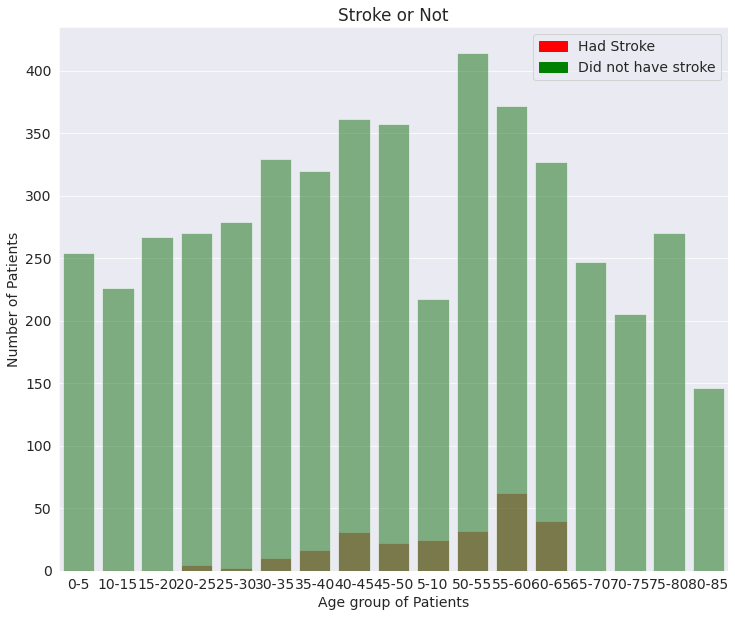

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x = stroke_patients.index , y = stroke_patients.stroke, alpha=0.5, palette =['red'])
sns.barplot(x = not_stroke_patients.index, y = not_stroke_patients.stroke, alpha = 0.5, palette = ['green'], estimator=sum, ci=None )
plt.title('Stroke or Not')
plt.xlabel('Age group of Patients')
stroke = mpatches.Patch(color= 'red', label='Had Stroke')
no_stroke= mpatches.Patch(color='green', label='Did not have stroke')
plt.legend(handles=[stroke, no_stroke])
plt.ylabel('Number of Patients');

As we can clearly see, that there are more number of patients having a stroke in the age range of 55-60 years. we have more number of patients in 50-55 age group. And the proportion of patients having stroke starts increasing from 45-50 age group and the number of patients. In this dataset patients have had more strokes in mid life than at young and old ages. 

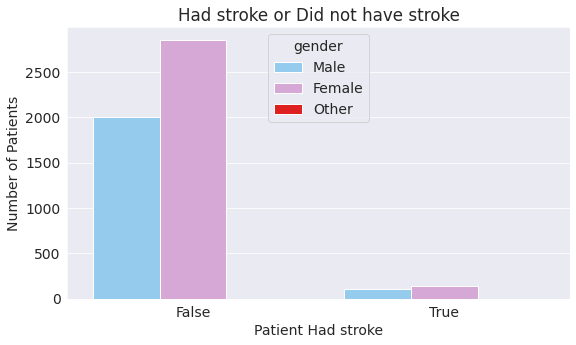

In [ ]:
sns.countplot(x = df.stroke, hue = df.gender, palette =['lightskyblue', 'plum','red'])
plt.title('Had stroke or Did not have stroke')
plt.xlabel('Patient Had stroke')
plt.ylabel('Number of Patients');

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67,False,True,True,Private,Urban,228.69,36.6,True,True,65-70
1,Female,61,False,False,True,Self-employed,Rural,202.21,NaN,False,True,60-65
2,Male,80,False,True,True,Private,Rural,105.92,32.5,False,True,80-85
3,Female,49,False,False,True,Private,Urban,171.23,34.4,True,True,45-50
4,Female,79,True,False,True,Self-employed,Rural,174.12,24.0,False,True,75-80
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,True,False,True,Private,Urban,83.75,NaN,False,False,80-85
5106,Female,81,False,False,True,Self-employed,Urban,125.20,40.0,False,False,80-85
5107,Female,35,False,False,True,Self-employed,Rural,82.99,30.6,False,False,35-40
5108,Male,51,False,False,True,Private,Rural,166.29,25.6,True,False,50-55


We have to analyze the number of patients having health abnormalities (high blood sugar and high bmi).
So, let's create another column in our data frame to indicate the abnormalities of the various records.

In [ ]:
#create columns to indicate abnormalities 
df['abnormal_glucose'] = np.where(((df.avg_glucose_level >= 80) & (df.avg_glucose_level <=130)) , 'False', 'True')
df['abnormal_bmi'] = np.where(((df.bmi >= 18.5) & (df.bmi <= 25)) , 'False', 'True')


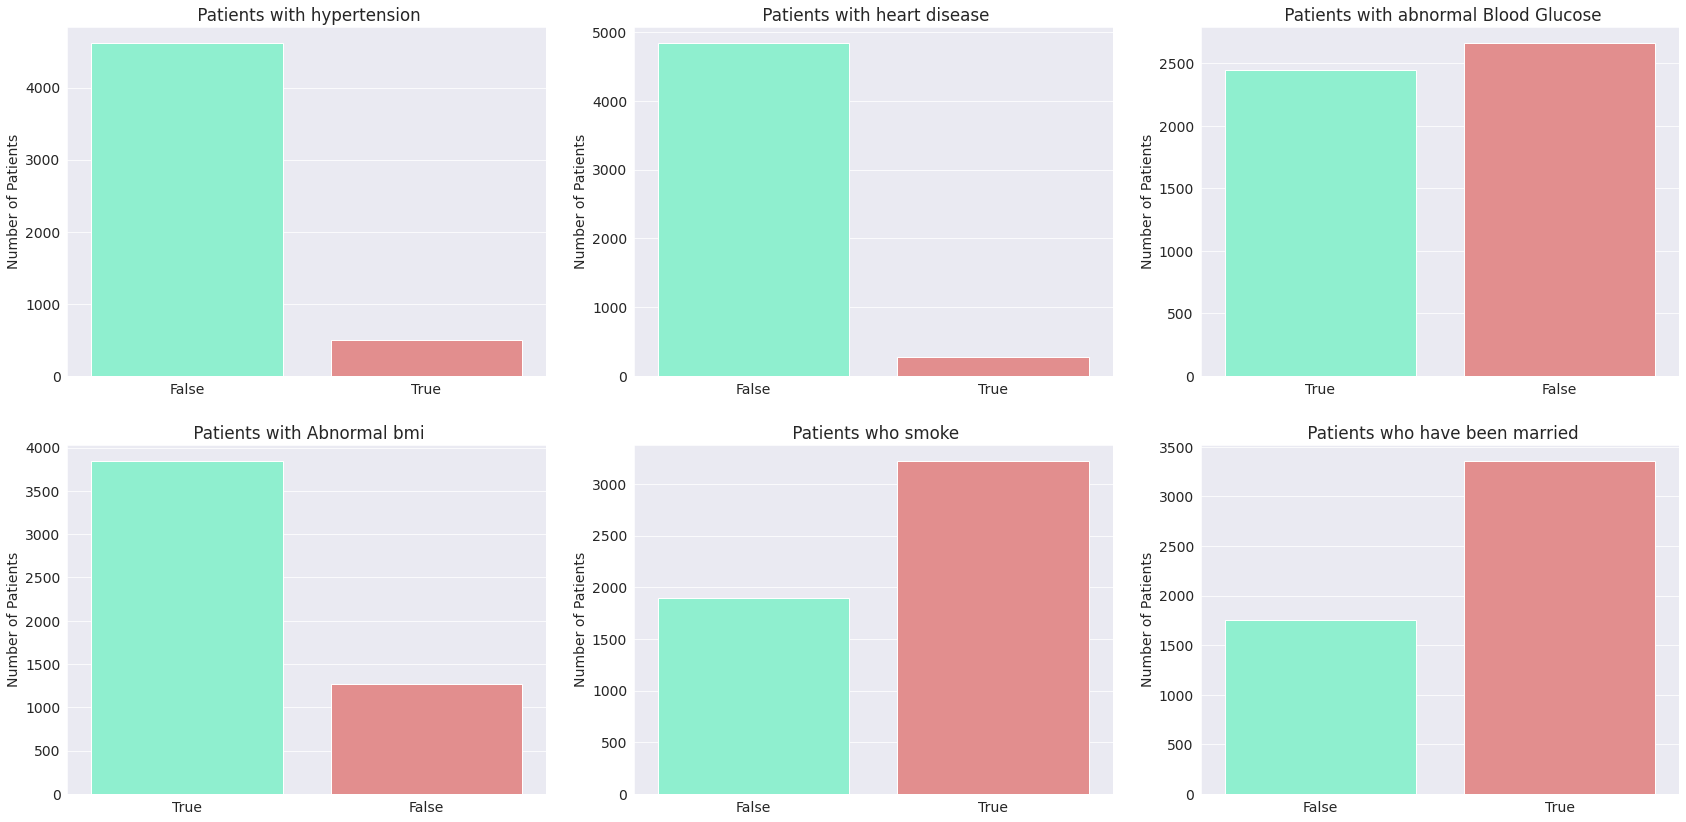

In [ ]:
fig, axis = plt.subplots(2,3, figsize =(24, 12)) 
#axis(0,0) use this axis for hypertension
axis[0,0].set_title(" Patients with hypertension")
sns.countplot(x = df.hypertension, ax=axis[0,0], palette=['aquamarine', 'lightcoral'] )
axis[0,0].set_xlabel("")
axis[0,0].set_ylabel("Number of Patients")


#axis(0,1) use this axis for heart disease 
axis[0,1].set_title(" Patients with heart disease")
sns.countplot(x = df.heart_disease, ax=axis[0,1], palette=['aquamarine', 'lightcoral'])
axis[0,1].set_xlabel("")
axis[0,1].set_ylabel("Number of Patients")



#axis(0,2) use this axis for glucose level 
axis[0,2].set_title(" Patients with abnormal Blood Glucose")
sns.countplot(x = df.abnormal_glucose, ax=axis[0,2], palette=['aquamarine', 'lightcoral'])
axis[0,2].set_xlabel("")
axis[0,2].set_ylabel("Number of Patients")


#axis(1,0) use this axis for abnormal bmi 
axis[1,0].set_title(" Patients with Abnormal bmi")
sns.countplot(x = df.abnormal_bmi, ax=axis[1,0], palette=['aquamarine', 'lightcoral'])
axis[1,0].set_xlabel("")
axis[1,0].set_ylabel("Number of Patients")



#axis(1,1) use this axis for smoking habit
axis[1,1].set_title(" Patients who smoke")
sns.countplot(x = df.smoking_status , ax=axis[1,1], palette=['aquamarine', 'lightcoral'])
axis[1,1].set_xlabel("")
axis[1,1].set_ylabel("Number of Patients")


#axis(1,2) use this axis for maaried patients 
axis[1,2].set_title(" Patients who have been married")
sns.countplot(x = df.ever_married , ax=axis[1,2], palette=['aquamarine', 'lightcoral'])
axis[1,2].set_xlabel("")
axis[1,2].set_ylabel("Number of Patients")


#to provide spacing between adjacent plots
plt.tight_layout(pad=2);

As we can clearly identify, that smoking and abnormal blood glucose is the  most common factor among the stroke patients.

Also abnormal BMI causes fat deposit in the inner walls of arteries which could cut out blood supply to the brain and cause a stroke.

Abnormal glucose can caue several other medical issues including stroke.



Pair wise relationship
Lets plot these numerical abnormalities against each other in a paiwise manner to find their correlation with each other. 

In [ ]:
#filter columns with numeric value
numeric_column = df[['age', 'avg_glucose_level', 'bmi']]

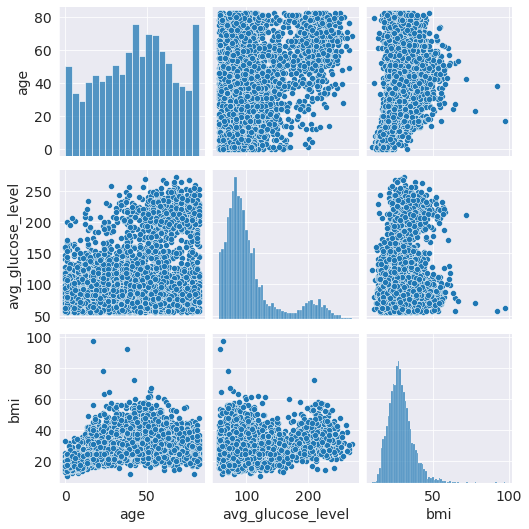

In [ ]:
sns.pairplot(numeric_column);

Attributes - Distribution

Let's build distribution plot for all columns with numeric values.

Distribution plot helps us to find whether the variables are normally distributed or skewed.

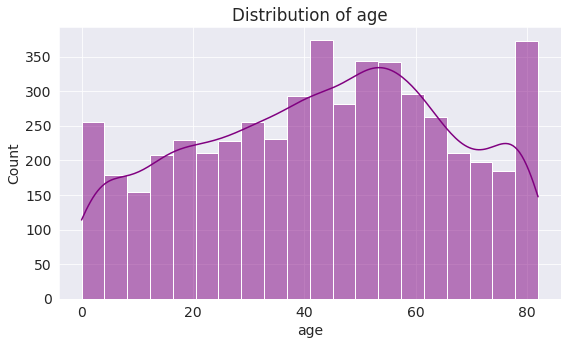

In [ ]:
plt.title("Distribution of age")
sns.histplot(df.age, kde = True, color ='purple');

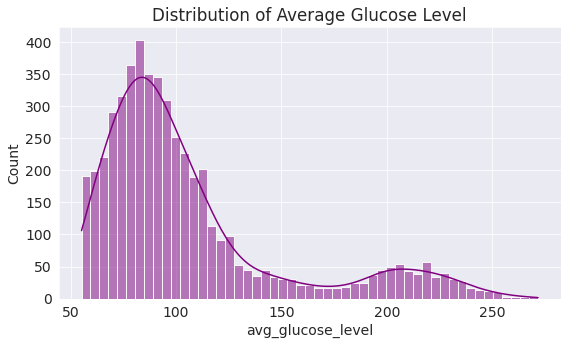

In [ ]:
plt.title("Distribution of Average Glucose Level") 
sns.histplot(df.avg_glucose_level, kde = True, color ='purple');

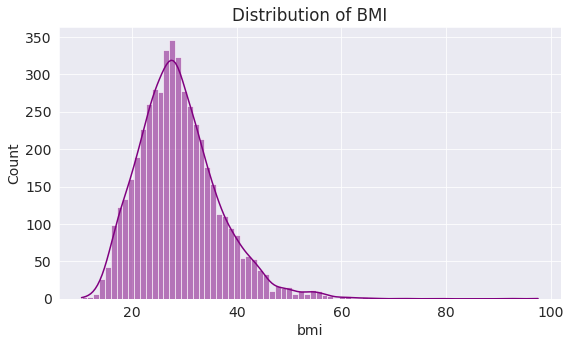

In [ ]:
plt.title("Distribution of BMI") 
sns.histplot(df.bmi, kde = True, color ='purple');

Now that we have plotted distribution plot for BMI, Average glucose level and age, it's visible that except BMI no values are normally distributed. Age and Glucose level are right skewed. If the skewness in the data is more, we may have to perform some modifications, in order to get better results from the Machine Learning models once we train them.

We can also do a catplot to plot the categorical variables with multiple categories

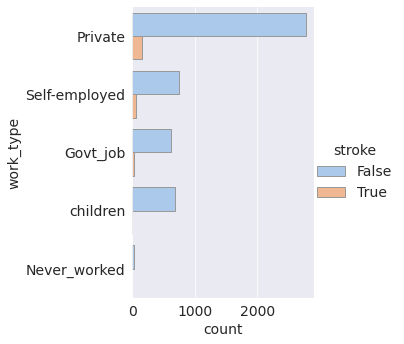

In [ ]:
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

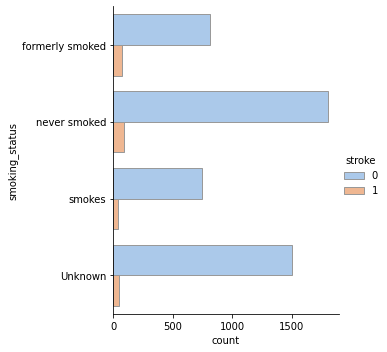

In [ ]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

<Figure size 1224x504 with 0 Axes>

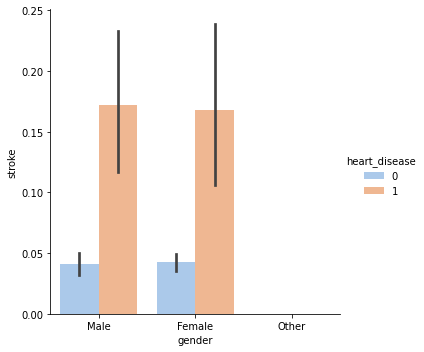

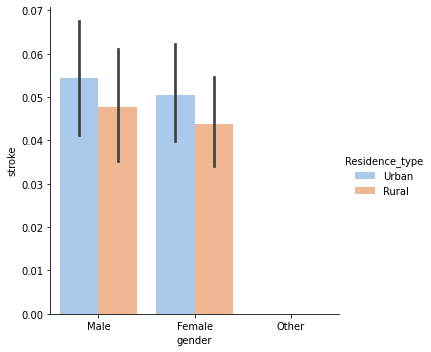

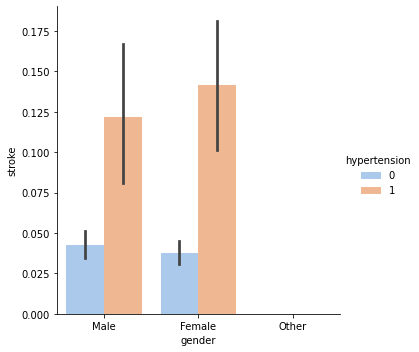

In [ ]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=df)
plt.show()

In [ ]:
#Genderwise distribution of stroke patients
len_data = len(df)
len_w = len(df[df["gender"]=="Male"])
len_m = len_data - len_w

men_stroke = len(df.loc[(df["stroke"]==1)&(df['gender']=="Male")])
men_no_stroke = len_m - men_stroke

women_stroke = len(df.loc[(df["stroke"]==1) & (df['gender']=="Female")])
women_no_stroke = len_w - women_stroke

labels = ['Men with stroke','Men healthy','Women with stroke','Women healthy']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of stroke EVENT according to their gender")
fig.show()

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

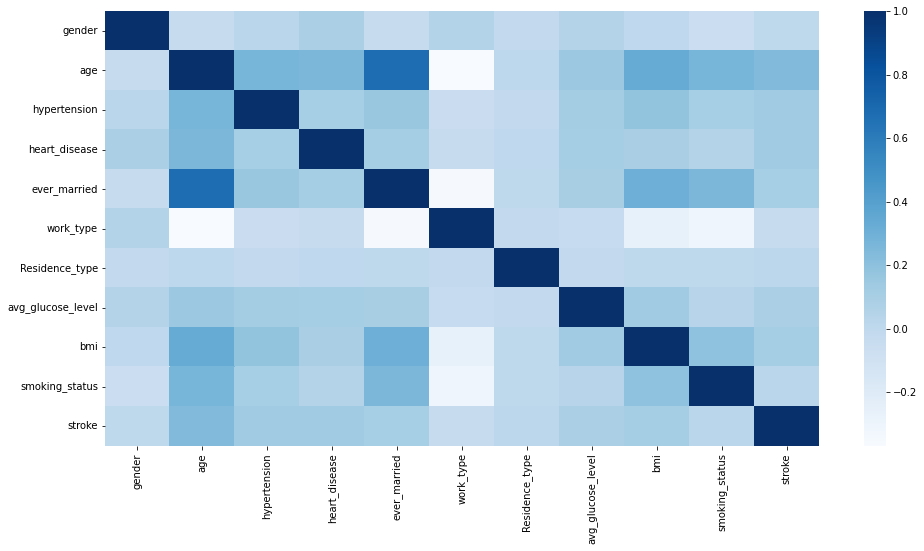

In [ ]:
#heatmap of the various factors among stroke patients

plt.figure(figsize=(16,8))
sns.heatmap(en_df.corr(),cmap="Blues");

From the heatmap, maried old patients are found to be the most common stroke patients .